[[4.20339587]
 [2.67699996]]
[[4.20339587]
 [6.88039583]]


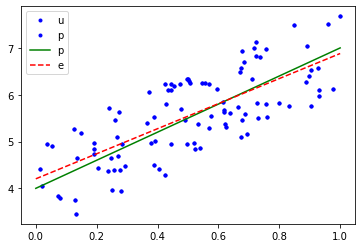

[4.20339587] [[2.67699996]]


In [1]:

#Topics Covered in this Chapter are:
  # Linear Regression : Closed Form
  # Linear Regression : Gradient Descent
  # Polynomial Regression
  # Regularization Techniques
  # Logistic Regression
  # Softmax Regression



# Linear Regression : Closed Form

  ## Linear regression (vectorized form)

    #     y_hat = hθ(x) = transpose(θ) . x
    #        where  θ = model's parameter vector
    #               x = instance's feature vector, x0 to xm, where x0=1 and m = numbe of features
    #               . = dot product
    #               hθ = hypothesis funtion, using the model parameter θ


    # Cost function is MSE(X,hθ), MSE : Mean Square Error

  ##The Normal Equation:

    # To find the value of θ that minimizes the cost function, there is a closed form solution
    # This is called The Normal Equation

    #     θ_hat = inverse(transpose(X) . X) . transpose(X).y
    #        where  X = Training Ser (a matrix)
    #               θ_hat = is the value of θ that minizes the cost function
    #               y = the vector of target values


# Practice Code
## Lets generate some linear looking data to test this equation
import numpy as np
X =  np.random.rand(100,1)
y = 4+3 * X + np.random.uniform(low = -1, high = 1,size = (100,1)) # Add noise

import matplotlib.pyplot as plt
plt.plot(X,y, 'b.')

ones = np.ones((100,1)) # generates a matrix of size 100X1
X_b = np.c_[ ones, X]   # adding X0 to each instance

# Lets compute the θ_hat
theta_best = np.linalg.inv( X_b.T.dot(X_b) ).dot( X_b.T.dot(y))
print(theta_best)
# As you see the theta best is not the exact paremter we have used above, but close enough
# because noise made it impossible to recover the exact parameters of the original equation

# Now we can make the predictions using θ_hat
X_new = np.array([[0],[1]]) # two instance with x1=0 and x1=2
X_new_b = np.c_[np.ones([2,1]), X_new] # Creating the training set by adding x0=1
y_predict = X_new_b.dot(theta_best)
print(y_predict)

theta_actual = np.array([4,3])
y_actual = X_new_b.dot(theta_actual)

plt.plot(X,y,"b.", label = 'Actual Data')
plt.plot(X_new,y_actual,"g-",  label = 'Actual Function')
plt.plot(X_new,y_predict,"r--",  label = 'Predicted Function, Linear Regression')
plt.legend('upper left')
plt.show()


# The equivalent code using Scikit-Learn looks like this :
from sklearn.linear_model import LinearRegression
lm_reg = LinearRegression()
lm_reg.fit(X,y)
print(lm_reg.intercept_, lm_reg.coef_) # Same as we have done manually

# Computational complexity of The Normal Equation
    #Computation complexity of inverting X_T.X matrix (nXn, where n is number of features)
        # is O(n^2.4) to O(n^3) depends on implementation
    #This euqtion is linear O(m) with number of instance (m)
    #Predictions are very fast.

#------------------------------------------------------------------------------------------------------#
# Linear Regression : Gradient Descent

# A different way to train a linear regression model
# better suited for cases where there are a large number of features.
# Or too many training instances to fit into memory.
